Genre Analysis: Below, I will explore the data, clean it and group features appropriately in order to analyze the data and find a useful business insight for Microsoft studios.

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
!ls ../zippedData/

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [3]:
df_imdb_combined_prof = pd.read_csv('../imdb_combined_prof.csv')
#Reading in file cleaned by other group member.

Sanity check and data exploration. I can see that the genres column often lists muliple 
genres for one film. In order to meaningfully analyze ROI versus genre, I will need to break
apart the genres combinations of the genres column entries.

In [4]:
df_imdb_combined_prof.head() 

,Unnamed: 0,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,...,ROI %,ROI $,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf,ROI%_inf
0,180,5662,tt1137470,Accidental Love,Accidental Love,2015,100.0,"['Comedy', 'Romance']",4.1,7048.0,...,-0.994791,-25864564,2015,March,1.15,155751.40,0.00,29900000.0,-29744248.60,-99.479092
1,369,7302,tt1403241,Wolves,Wolves,2014,91.0,"['Action', 'Fantasy', 'Horror']",5.3,7312.0,...,-0.994725,-17905047,2014,November,1.15,109195.95,0.00,20700000.0,-20590804.05,-99.472483
2,169,5622,tt1125929,Love Ranch,Love Ranch,2010,117.0,"['Biography', 'Comedy', 'Drama']",5.6,2742.0,...,-0.994154,-24853851,2010,June,1.25,182686.25,172356.25,31250000.0,-31067313.75,-99.415404
3,472,9207,tt1545106,Vamps,Vamps,2012,92.0,"['Comedy', 'Horror', 'Romance']",5.2,8838.0,...,-0.994074,-15905188,2012,November,1.19,112826.28,3999.59,19040000.0,-18927173.72,-99.407425
4,436,8171,tt1486193,5 Days of War,5 Days of War,2011,113.0,"['Action', 'Drama', 'War']",5.6,13089.0,...,-0.992684,-11912207,2011,August,1.21,106229.53,21149.59,14520000.0,-14413770.47,-99.268392


In [5]:
df_imdb_combined_prof.columns #Data exploration(deciding which ROI measurement to use).

Index(['Unnamed: 0', 'Unnamed: 0_x', 'tconst', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'writers', 'actor', 'actress',
       'archive_footage', 'archive_sound', 'cinematographer', 'composer',
       'director_pr', 'editor', 'producer', 'production_designer', 'self',
       'writer_pr', 'concat', 'Unnamed: 0_y', 'id', 'release_date', 'movie',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'ROI %',
       'ROI $', 'year', 'month', 'inflation', 'worldwide_gross_inf',
       'domestic_gross_inf', 'production_budget_inf', 'ROI $ Inf', 'ROI%_inf'],
      dtype='object')

Data exploration: 
I decided to use ROI % after discussion with my group members about their prior data cleaning and the mathematical operations used to create each of the ROI features seen in the column list above. 

This is a skewed distribution as evidenced by the fact that the mean is larger than the median (50%). 
As a sidenote, this dataframe was already heavily cleaned (and the product of multiple merges) by another group member. We decided to eliminate certain movies to decrease the skew. There is obviously no way to meanigfully eliminate the skew without losing valuable dating. In real world terms, this means that the movie industry is inately skewed in the sense that blockbuster movies with significantly higher ROI's exist each year.

In [6]:
df_imdb_combined_prof['ROI %'].describe() 

count    1368.000000
mean        2.719149
std         5.134898
min        -0.994791
25%         0.127497
50%         1.379361
75%         3.215480
max        58.170677
Name: ROI %, dtype: float64

In [7]:
#Data exploration: finding null values within the feature I will explore.
df_imdb_combined_prof['genres'].isna().sum() 

4

In [8]:
#Data cleaning: dropping null values within the feature I will explore.
df_imdb_combined_prof.dropna(subset= ['genres'], inplace = True)

In [9]:
#converting the type of genres to column to list type to make it usable with the .explode method
df_imdb_combined_prof['genres'] = df_imdb_combined_prof['genres'].apply(literal_eval)
#using .explode method to 
df_imdb_combined_prof_exploded = df_imdb_combined_prof.explode('genres')

In [10]:
df_imdb_combined_prof_exploded.head() #sanity check

,Unnamed: 0,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,...,ROI %,ROI $,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf,ROI%_inf
0,180,5662,tt1137470,Accidental Love,Accidental Love,2015,100.0,Comedy,4.1,7048.0,...,-0.994791,-25864564,2015,March,1.15,155751.40,0.0,29900000.0,-29744248.60,-99.479092
0,180,5662,tt1137470,Accidental Love,Accidental Love,2015,100.0,Romance,4.1,7048.0,...,-0.994791,-25864564,2015,March,1.15,155751.40,0.0,29900000.0,-29744248.60,-99.479092
1,369,7302,tt1403241,Wolves,Wolves,2014,91.0,Action,5.3,7312.0,...,-0.994725,-17905047,2014,November,1.15,109195.95,0.0,20700000.0,-20590804.05,-99.472483
1,369,7302,tt1403241,Wolves,Wolves,2014,91.0,Fantasy,5.3,7312.0,...,-0.994725,-17905047,2014,November,1.15,109195.95,0.0,20700000.0,-20590804.05,-99.472483
1,369,7302,tt1403241,Wolves,Wolves,2014,91.0,Horror,5.3,7312.0,...,-0.994725,-17905047,2014,November,1.15,109195.95,0.0,20700000.0,-20590804.05,-99.472483


Creating a new column named 'ROI_percent' which multiples 'ROI %' by 100 to make a percentage and to eliminate an issue later since % is a reserved symbol within python.

In [11]:
df_imdb_combined_prof_exploded['ROI_percent'] = df_imdb_combined_prof_exploded['ROI %']*100

In [12]:
#Sanity check and demonstration that exploding the dataframe changed the descriptive statistics of 'ROI percent.'
df_imdb_combined_prof_exploded['ROI_percent'].describe()

count    3512.000000
mean      270.287695
std       496.040610
min       -99.479092
25%        16.348439
50%       138.491752
75%       324.384139
max      5817.067733
Name: ROI_percent, dtype: float64

In [13]:
#Grouping the dataframe by genres to look at eck genre's 'ROI_percent'
genre_ROI = df_imdb_combined_prof_exploded.groupby('genres').ROI_percent
genre_ROI.describe() #sanity check and looking at descriptive stats based on new grouping.

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,411.0,183.397307,266.165162,-99.472483,19.477223,125.463961,270.597441,3001.627558
Adventure,340.0,217.496676,239.308972,-99.205725,63.367452,167.750157,307.209375,1468.021855
Animation,97.0,282.592459,282.472013,-85.416172,95.303086,199.921813,345.300955,1468.021855
Biography,130.0,251.011227,446.260157,-99.415404,-25.516269,94.328534,317.034311,3001.627558
Comedy,472.0,243.816873,338.078218,-99.479092,44.017757,156.628634,328.459569,2617.924114
Crime,218.0,130.768016,222.054675,-98.279956,-19.581898,72.985255,207.680034,1543.458800
Documentary,42.0,253.274574,518.885043,-95.988800,-3.421200,124.417462,245.064645,2876.130200
Drama,663.0,249.504995,474.161479,-99.415404,-14.850720,106.440860,319.279478,4249.700800
Family,86.0,175.284280,256.565523,-85.416172,30.380347,110.610765,236.706486,1423.023560


In [14]:
#Finding mean of ROI genres.
ROI_by_genre = df_imdb_combined_prof_exploded.groupby('genres').ROI_percent.agg('mean')
#Sorting values to allow for max to min ordering when using this dataframe below in a bar graph of genre ROI's.
ROI_by_genre = ROI_by_genre.sort_values(ascending = False)
ROI_by_genre #sanity check

genres
Horror         645.812169
Mystery        600.360445
Thriller       442.218883
Sci-Fi         293.010785
Romance        290.433065
Music          285.042698
Animation      282.592459
Musical        276.252407
Documentary    253.274574
Biography      251.011227
Drama          249.504995
Comedy         243.816873
Fantasy        233.090989
Adventure      217.496676
Action         183.397307
Family         175.284280
History        154.924390
Crime          130.768016
Sport          123.075451
Western        110.666887
War             41.110865
Name: ROI_percent, dtype: float64

In [15]:
#Calculating how much more profitable the top three earning genres are (by ROI) than the average ROI for all genres.
avg_ROI_top3 = (ROI_by_genre.values[:3].sum())/3
avg_ROI_all = 270
percent_diff = ((avg_ROI_top3 - avg_ROI_all)/avg_ROI_all)*100
percent_diff

108.44339458104197

Text(0, 0.5, 'Genres')

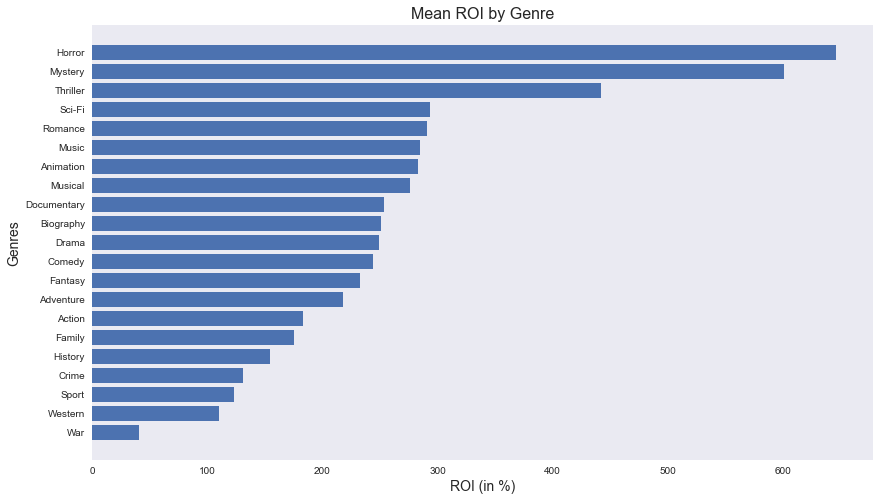

In [16]:
#Creating a bar graph of the mean ROI's of al
fig, ax = plt.subplots(figsize = (14,8))

y = ROI_by_genre.index
x = ROI_by_genre.values
ax.barh(y = y, width = x)
ax.invert_yaxis()
ax.grid(False)
ax.set_title('Mean ROI by Genre', fontsize=16)
ax.set_xlabel('ROI (in %)', fontsize=14)
ax.set_ylabel('Genres', fontsize=14)

Conclusions: Horror, Mystery and Thriller moves are the most profitable, witht the highest mean ROI's. There are many genres that sit in a middle tier that still have highly respectble ROI's.

In [17]:
#Creating a dataframe that groups by year and genre and shows the mean of each genre for each year.
ROI_by_genre_year = df_imdb_combined_prof_exploded.groupby(['year','genres']).ROI_percent.agg('mean')
ROI_by_genre_year #sanity check

year  genres   
2010  Action       137.226778
      Adventure    214.250419
      Animation    268.647536
      Biography    189.884031
      Comedy       148.570491
                      ...    
2019  Music        164.982256
      Mystery      403.673586
      Romance      436.300083
      Sci-Fi       271.590378
      Thriller     576.960967
Name: ROI_percent, Length: 195, dtype: float64

In [18]:
df_ROI_by_genre_year = ROI_by_genre_year.reset_index()

Binning top, middle and bottom earning genres so that I can call upon 
the bins below in creating a time series of the grouped genres.

In [19]:
bins = [0, 200, 400, 800]
labels = ['bottom', 'middle', 'top'] 
df_ROI_by_genre_year['profitability'] = pd.cut(df_ROI_by_genre_year['ROI_percent'], bins=bins, labels=labels)

In [20]:
df_ROI_by_genre_year #sanity check

,year,genres,ROI_percent,profitability
0,2010,Action,137.226778,bottom
1,2010,Adventure,214.250419,middle
2,2010,Animation,268.647536,middle
3,2010,Biography,189.884031,bottom
4,2010,Comedy,148.570491,bottom
...,...,...,...,...
190,2019,Music,164.982256,bottom
191,2019,Mystery,403.673586,top
192,2019,Romance,436.300083,top
193,2019,Sci-Fi,271.590378,middle


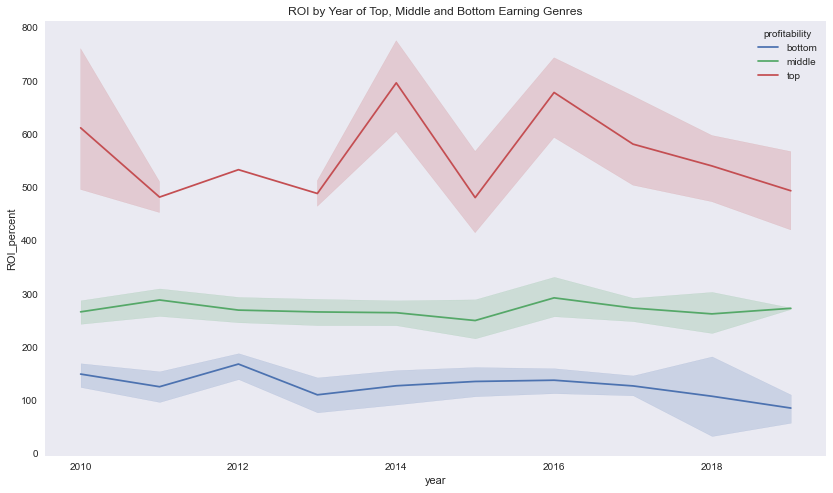

In [21]:
#Creating a timseries/line graph of ROI of the top, middle and bottom earning genres.
fig, ax = plt.subplots(figsize = (14,8))

sns.lineplot(data = df_ROI_by_genre_year, 
             x= 'year', y = 'ROI_percent', 
             hue = 'profitability').set_title('ROI by Year of Top, Middle and Bottom Earning Genres')

ax.grid(False)

sns.set(font_scale = 2)

Conclusions: top performers showed more ROI variability by year,middle performers showed far more ROI stability than top earners, Bottom performers showed a decline in ROI in recent years.